In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, timedelta
import yfinance as yf


In [94]:
# Load Apple stock data using yfinance
data = yf.download('RELIANCE.BO', start='2024-01-01', end=datetime.today().strftime('%Y-%m-%d'))
data.reset_index(inplace=True)
data['Target'] = data['Close']

[*********************100%***********************]  1 of 1 completed


In [95]:
# Load Apple stock data using yfinance
data = yf.download('RELIANCE.BO', start='2024-01-01', end=datetime.today().strftime('%Y-%m-%d'))
data.reset_index(inplace=True)
data['Target'] = data['Close']

[*********************100%***********************]  1 of 1 completed


In [96]:
# Define features and target
features = data[['Open', 'Volume']].values  # Use values to remove feature names
target = data['Target'].values

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features, target, data['Date'], test_size=0.2, random_state=42)

In [98]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [99]:
# Make predictions
y_pred = model.predict(X_test)

In [100]:
# Define Buy/Sell/Hold indicators
threshold = 0.02  # 2% threshold for Buy/Sell
indicators = []
for actual, predicted in zip(y_test, y_pred):
    if predicted > actual * (1 + threshold):
        indicators.append('BUY')
    elif predicted < actual * (1 - threshold):
        indicators.append('SELL')
    else:
        indicators.append('HOLD')

In [101]:
# Create a DataFrame to show actual prices, predicted prices, and indicators
results = pd.DataFrame({
    'Date': date_test.values,
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Indicator': indicators
})

In [102]:
# Print the results
print(results.head(500))

         Date  Actual Price  Predicted Price Indicator
0  2024-10-10   1371.025024      1381.878279      HOLD
1  2024-01-09   1290.300049      1299.968119      HOLD
2  2024-04-30   1465.574951      1462.557731      HOLD
3  2024-11-01   1339.099976      1340.055752      HOLD
4  2024-06-26   1513.699951      1448.886920      SELL
5  2024-10-03   1407.625000      1442.537713       BUY
6  2024-10-25   1327.724976      1345.637213      HOLD
7  2024-09-06   1464.925049      1493.509812      HOLD
8  2024-01-12   1370.050049      1360.207951      HOLD
9  2024-02-14   1481.300049      1452.741129      HOLD
10 2024-09-25   1493.724976      1480.962975      HOLD
11 2024-11-27   1292.900024      1297.096609      HOLD
12 2024-12-09   1295.150024      1304.568375      HOLD
13 2024-11-21   1223.199951      1250.025252       BUY
14 2024-07-24   1495.324951      1478.870094      HOLD
15 2024-04-12   1467.550049      1475.547415      HOLD
16 2024-10-22   1343.650024      1369.475531      HOLD
17 2024-01

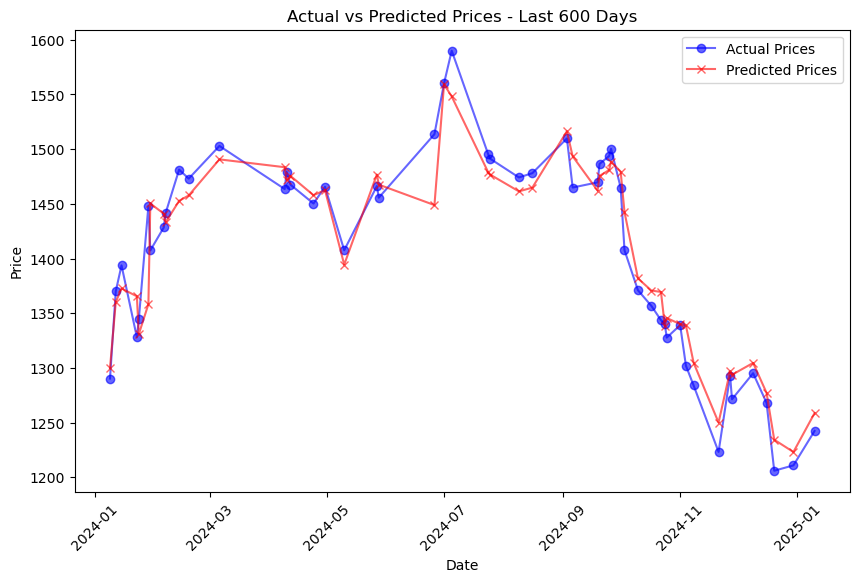

In [103]:
# Visualize predictions vs actual values for the last n days
last_n_days = results.sort_values(by='Date').tail(1000)
plt.figure(figsize=(10, 6))
plt.plot(last_n_days['Date'], last_n_days['Actual Price'], label="Actual Prices", color="blue", alpha=0.6, marker='o')
plt.plot(last_n_days['Date'], last_n_days['Predicted Price'], label="Predicted Prices", color="red", alpha=0.6, marker='x')
plt.legend()
plt.title("Actual vs Predicted Prices - Last 600 Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

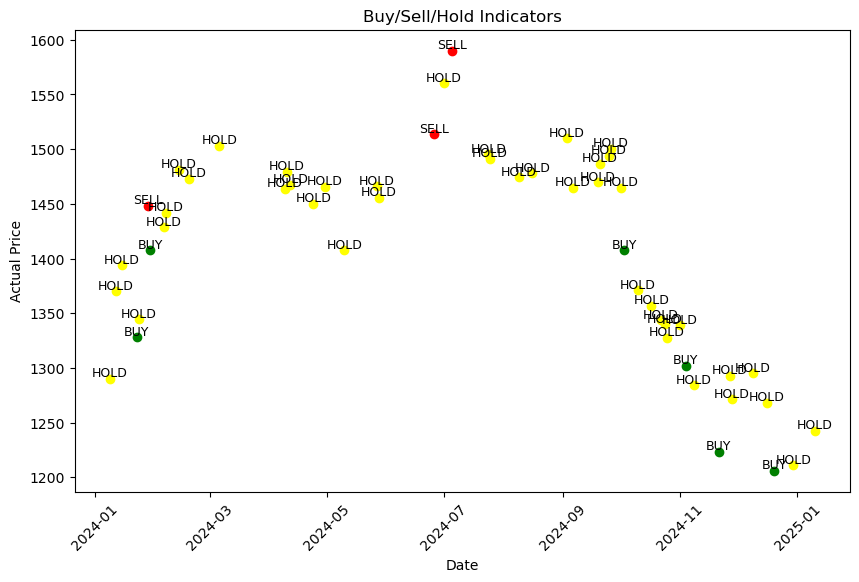

In [104]:
# Visualize Buy/Sell/Hold Indicators
plt.figure(figsize=(10, 6))
for i, (date, actual, indicator) in enumerate(zip(results['Date'], results['Actual Price'], results['Indicator'])):
    color = 'green' if indicator == 'BUY' else 'red' if indicator == 'SELL' else 'yellow'
    plt.scatter(date, actual, color=color)
    plt.text(date, actual + 2, indicator, fontsize=9, ha='center')  # Adding labels above points

plt.title("Buy/Sell/Hold Indicators")
plt.xlabel("Date")
plt.ylabel("Actual Price")
plt.xticks(rotation=45)
plt.show()

In [105]:
# Predict for future dates using the last available Open and Volume data
last_open = data['Open'].iloc[-1]
last_volume = data['Volume'].iloc[-1]
future_data = pd.DataFrame({
    'Date': [datetime.today() + timedelta(days=i) for i in range(1, 11)],  # Future dates from today
    'Open': [last_open] * 10,  # Use the last known Open price
    'Volume': [last_volume] * 10  # Use the last known Volume
})

In [106]:
# Make future predictions
future_predictions = model.predict(future_data[['Open', 'Volume']].values)  # Convert to values to avoid feature name warning

In [107]:
# Define future Buy/Sell/Hold indicators
future_indicators = []
for open_price, predicted in zip(future_data['Open'].to_numpy(), future_predictions):
    open_price = open_price.item()  # Ensure open_price is a scalar
    if predicted > open_price * (1 + threshold):
        future_indicators.append('BUY')
    elif predicted < open_price * (1 - threshold):
        future_indicators.append('SELL')
    else:
        future_indicators.append('HOLD')

In [108]:
# Display future predictions with indicators
future_results = pd.DataFrame({
    'Date': future_data['Date'],
    'Future Open': future_data['Open'],
    'Future Volume': future_data['Volume'],
    'Predicted Close Price': future_predictions,
    'Indicator': future_indicators
})

print("Future Predictions:")
print(future_results)

Future Predictions:
                        Date  \
0 2025-01-16 19:32:22.941114   
1 2025-01-17 19:32:22.941114   
2 2025-01-18 19:32:22.941114   
3 2025-01-19 19:32:22.941114   
4 2025-01-20 19:32:22.941114   
5 2025-01-21 19:32:22.941114   
6 2025-01-22 19:32:22.941114   
7 2025-01-23 19:32:22.941114   
8 2025-01-24 19:32:22.941114   
9 2025-01-25 19:32:22.941114   

                                         Future Open  \
0  Ticker
RELIANCE.BO    1240.0
Name: 253, dtype:...   
1  Ticker
RELIANCE.BO    1240.0
Name: 253, dtype:...   
2  Ticker
RELIANCE.BO    1240.0
Name: 253, dtype:...   
3  Ticker
RELIANCE.BO    1240.0
Name: 253, dtype:...   
4  Ticker
RELIANCE.BO    1240.0
Name: 253, dtype:...   
5  Ticker
RELIANCE.BO    1240.0
Name: 253, dtype:...   
6  Ticker
RELIANCE.BO    1240.0
Name: 253, dtype:...   
7  Ticker
RELIANCE.BO    1240.0
Name: 253, dtype:...   
8  Ticker
RELIANCE.BO    1240.0
Name: 253, dtype:...   
9  Ticker
RELIANCE.BO    1240.0
Name: 253, dtype:...   

          

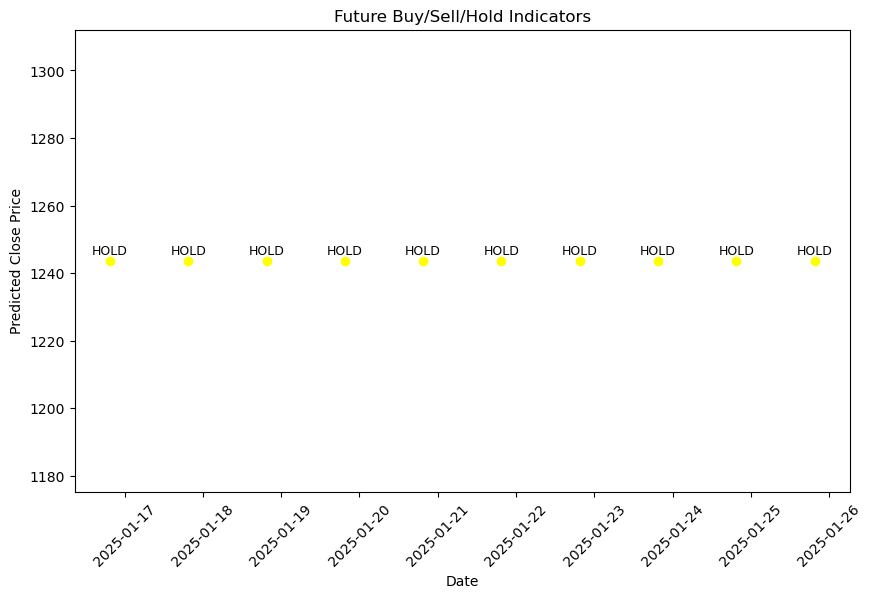

In [109]:
# Visualize future Buy/Sell/Hold Indicators
plt.figure(figsize=(10, 6))
for date, predicted, indicator in zip(future_results['Date'], future_results['Predicted Close Price'], future_results['Indicator']):
    color = 'green' if indicator == 'BUY' else 'red' if indicator == 'SELL' else 'yellow'
    plt.scatter(date, predicted, color=color)
    plt.text(date, predicted + 2, indicator, fontsize=9, ha='center')  # Adding labels above points

plt.title("Future Buy/Sell/Hold Indicators")
plt.xlabel("Date")
plt.ylabel("Predicted Close Price")
plt.xticks(rotation=45)
plt.show()


In [110]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 584.8952455910769
R-squared: 0.9351127986378462
